## PHY 411: Final Project
### Jeremy Kazimer
### 5018-1732

---

#### _Import Statements_

To begin this portion of the project, we import the Python file I created which contains the network class and its methods:

In [2]:
from generate_network import *

Consider that an explanation of the code is partially within the .py itself, but also in the documentation on GitHub.  We can also import `numpy` and `matplotlib` such that we can use their code here:

In [61]:
from numpy import arange, array, linspace, mean, zeros
from matplotlib import pyplot as plt

As always, we can begin by generating a network:

#### _Generating Networks_

Using the same theory from the `network_analysis.ipynb` notebook, we can create a network with parameters $N = 100$ and $p = 0.25$:

In [59]:
N = 100
p = 0.25

In [5]:
G = Erdos_Renyi_GNP(N, p)

Now, we can begin some preliminary analysis.  First, of course, on the network structure itself:

#### _Monte Carlo Simulation on Number of Edges_

Fundamentally, a random graph is defined by its network size $N$ and edge probability $p$.  However, a quantity necessary in forming a graph is the set of edges and subsequently the number of said edges.  Since the number of edges is itself not set as a parameter, there is not exactly a definitive number of edges.  

Although, people working in network theory have derived an approximation for the mean number of edges $\bar{M}$ such that
\begin{equation}
\bar{M} \approx \dfrac{N(N - 1)}{2} \cdot p
\end{equation}

Since $\frac{N(N - 1)}{2}$ represents the number of possible edges for an undirected and unweighted graph, multiplying it by the probability would give the mean number of edges.  Note that this quantity is known; so we cannot exactly apply a Monte Carlo simulation in good faith here.  However, we can use Monte Carlo as a framework to verify that, for any network, this approximation is strong.  As such, we can begin by looking at one case, with our initial graph:

In [10]:
max_edges = lambda N: N*(N - 1)/2

In [12]:
print('theoretical number of edges: {}'.format(max_edges(G.N) * G.p))

theoretical number of edges: 1237.5


In [13]:
print('actual number of edges: {}'.format(G.M))

actual number of edges: 1247.0


So, it's fairly close, but not quite.  To better approximate this, we can easily just generate $n$ different graphs for the parameters $N = 100$ and $p = 0.25$ so that we can compare the average of the set of $n$:

In [15]:
n = 100
Ms = zeros(n)

for i in range(n):
    G1 = Erdos_Renyi_GNP(N, p)
    Ms[i] = G1.M

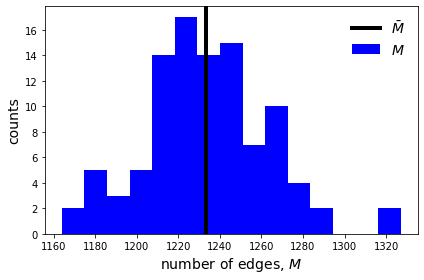

In [29]:
fig, ax = plt.subplots(1, 1)

ax.hist(Ms, 15, color = 'blue', label = '$M$')
ax.set_ylabel('counts', fontsize = 14)
ax.set_xlabel('number of edges, $M$', fontsize = 14)

ax.axvline(Ms.mean(), lw = 4, c = 'k', label = r'$\bar{M}$')

ax.legend(loc = 'upper right', fontsize = 14, frameon = False)

fig.tight_layout();

In [30]:
print('actual number of edges: {}'.format(Ms.mean()))

actual number of edges: 1233.51


So, the number is much closer! If $n$ is increased, then certainly this number will be better.  But how does it scale for different network sizes, different probabilities?

In [45]:
Ns = arange(2, N, 4)
Ms = zeros((n, Ns.shape[0]))

for i in range(n):
    for j, N in enumerate(Ns):
        G1 = Erdos_Renyi_GNP(N, p)
        Ms[i, j] = G1.M

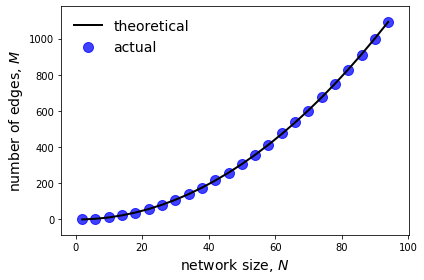

In [58]:
fig, ax = plt.subplots(1, 1)

ax.plot(Ns, max_edges(Ns)*p, lw = 2, c = 'k', label = 'theoretical')
ax.scatter(Ns, Ms.mean(axis = 0), c = 'blue', s = 100, alpha = 0.75, label = 'actual')

ax.set_ylabel('number of edges, $M$', fontsize = 14)
ax.set_xlabel('network size, $N$', fontsize = 14)

ax.legend(loc = 'upper left', fontsize = 14, frameon = False)

fig.tight_layout();

This seems to be verified, but what about on edge probability?

In [62]:
N = 100
ps = linspace(0, 1, 20)
Ms = zeros((n, ps.shape[0]))

for i in range(n):
    for j, p in enumerate(ps):
        G1 = Erdos_Renyi_GNP(N, p)
        Ms[i, j] = G1.M

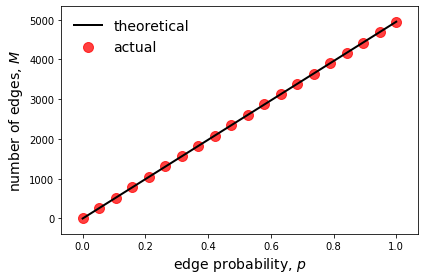

In [64]:
fig, ax = plt.subplots(1, 1)

ax.plot(ps, max_edges(N)*ps, lw = 2, c = 'k', label = 'theoretical')
ax.scatter(ps, Ms.mean(axis = 0), c = 'red', s = 100, alpha = 0.75, label = 'actual')

ax.set_ylabel('number of edges, $M$', fontsize = 14)
ax.set_xlabel('edge probability, $p$', fontsize = 14)

ax.legend(loc = 'upper left', fontsize = 14, frameon = False)

fig.tight_layout();

Clearly, it is safe to say that these approximations work for large enough $n$.  It is no question that these mathematicians were correct in their formulations.  That aside, Monte Carlo acts as a nice medium to confirm this.  In a way, by using Monte Carlo in such a way, we confirm its validity in working on network frameworks.  By comparing it to known formulations for a random process, we've confirmed that it can be used in such a way.  This will be useful, when we stare into the unknown of networks - where such quantities are unknown.

## To be continued...